# Exploring World Remittances Data 1970 - Present

Note: Some of the codes/functions in this notebook were borrowed from Alfred Essa 
      Check out his YouTube site for more info: https://www.youtube.com/watch?v=ZrRpN_IrcBA

In [ ]:
# load libraries and set styles, options

import warnings; warnings. simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib; matplotlib.style.use('ggplot')

from pandas import set_option
set_option("display.max_rows", 16)

LARGE_FIGSIZE = (12, 8)

from ipywidgets import interact

In [2]:
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
figsize = (15, 5) # not sure if I'll use this later

In [3]:
# inline plots
%matplotlib inline

In [4]:
# read csv dataset and load into pandas dataframe object "remit"
remit = pd.read_csv('data/remittance-inflow.csv')

In [5]:
# check first few lines
remit.head()

,Migrant remittance inflows (US$ million),1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017p
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,105.686039,152.206608,342.065526,185.349162,251.736723,313.756248,268.060745,301.173792,430.839232,479.334628
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1495.038254,1318.476279,1156.021682,1125.664516,1027.055045,1093.922787,1141.680000,1046.980032,1051.219968,1070.141927
2,Algeria,211.0,238.0,227.0,225.0,202.0,266.0,255.0,349.0,393.0,...,2202.000000,2059.000000,2044.000000,1942.000000,1942.000000,2000.000000,2000.000000,2000.000000,2000.000000,2064.543639
3,American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
# verify data frame shape
remit.shape

(215, 49)

In [7]:
# review dataframe info
remit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 49 columns):
Migrant remittance inflows (US$ million)    215 non-null object
1970                                        215 non-null float64
1971                                        215 non-null float64
1972                                        215 non-null float64
1973                                        215 non-null float64
1974                                        215 non-null float64
1975                                        215 non-null float64
1976                                        215 non-null float64
1977                                        215 non-null float64
1978                                        215 non-null float64
1979                                        215 non-null float64
1980                                        215 non-null float64
1981                                        215 non-null float64
1982                                        215 non

In [8]:
# set dataframe row index to country
remit = remit.set_index('Migrant remittance inflows (US$ million)')

In [9]:
# or read in and set index with one line as dataframe "remit_ind"
remit_ind = pd.read_csv('data/remittance-inflow.csv', index_col='Migrant remittance inflows (US$ million)')

In [10]:
# Look at the first 3 rows
remit_ind[:3]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017p
Migrant remittance inflows (US$ million),,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,105.686039,152.206608,342.065526,185.349162,251.736723,313.756248,268.060745,301.173792,430.839232,479.334628
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1495.038254,1318.476279,1156.021682,1125.664516,1027.055045,1093.922787,1141.680000,1046.980032,1051.219968,1070.141927
Algeria,211.0,238.0,227.0,225.0,202.0,266.0,255.0,349.0,393.0,417.0,...,2202.000000,2059.000000,2044.000000,1942.000000,1942.000000,2000.000000,2000.000000,2000.000000,2000.000000,2064.543639


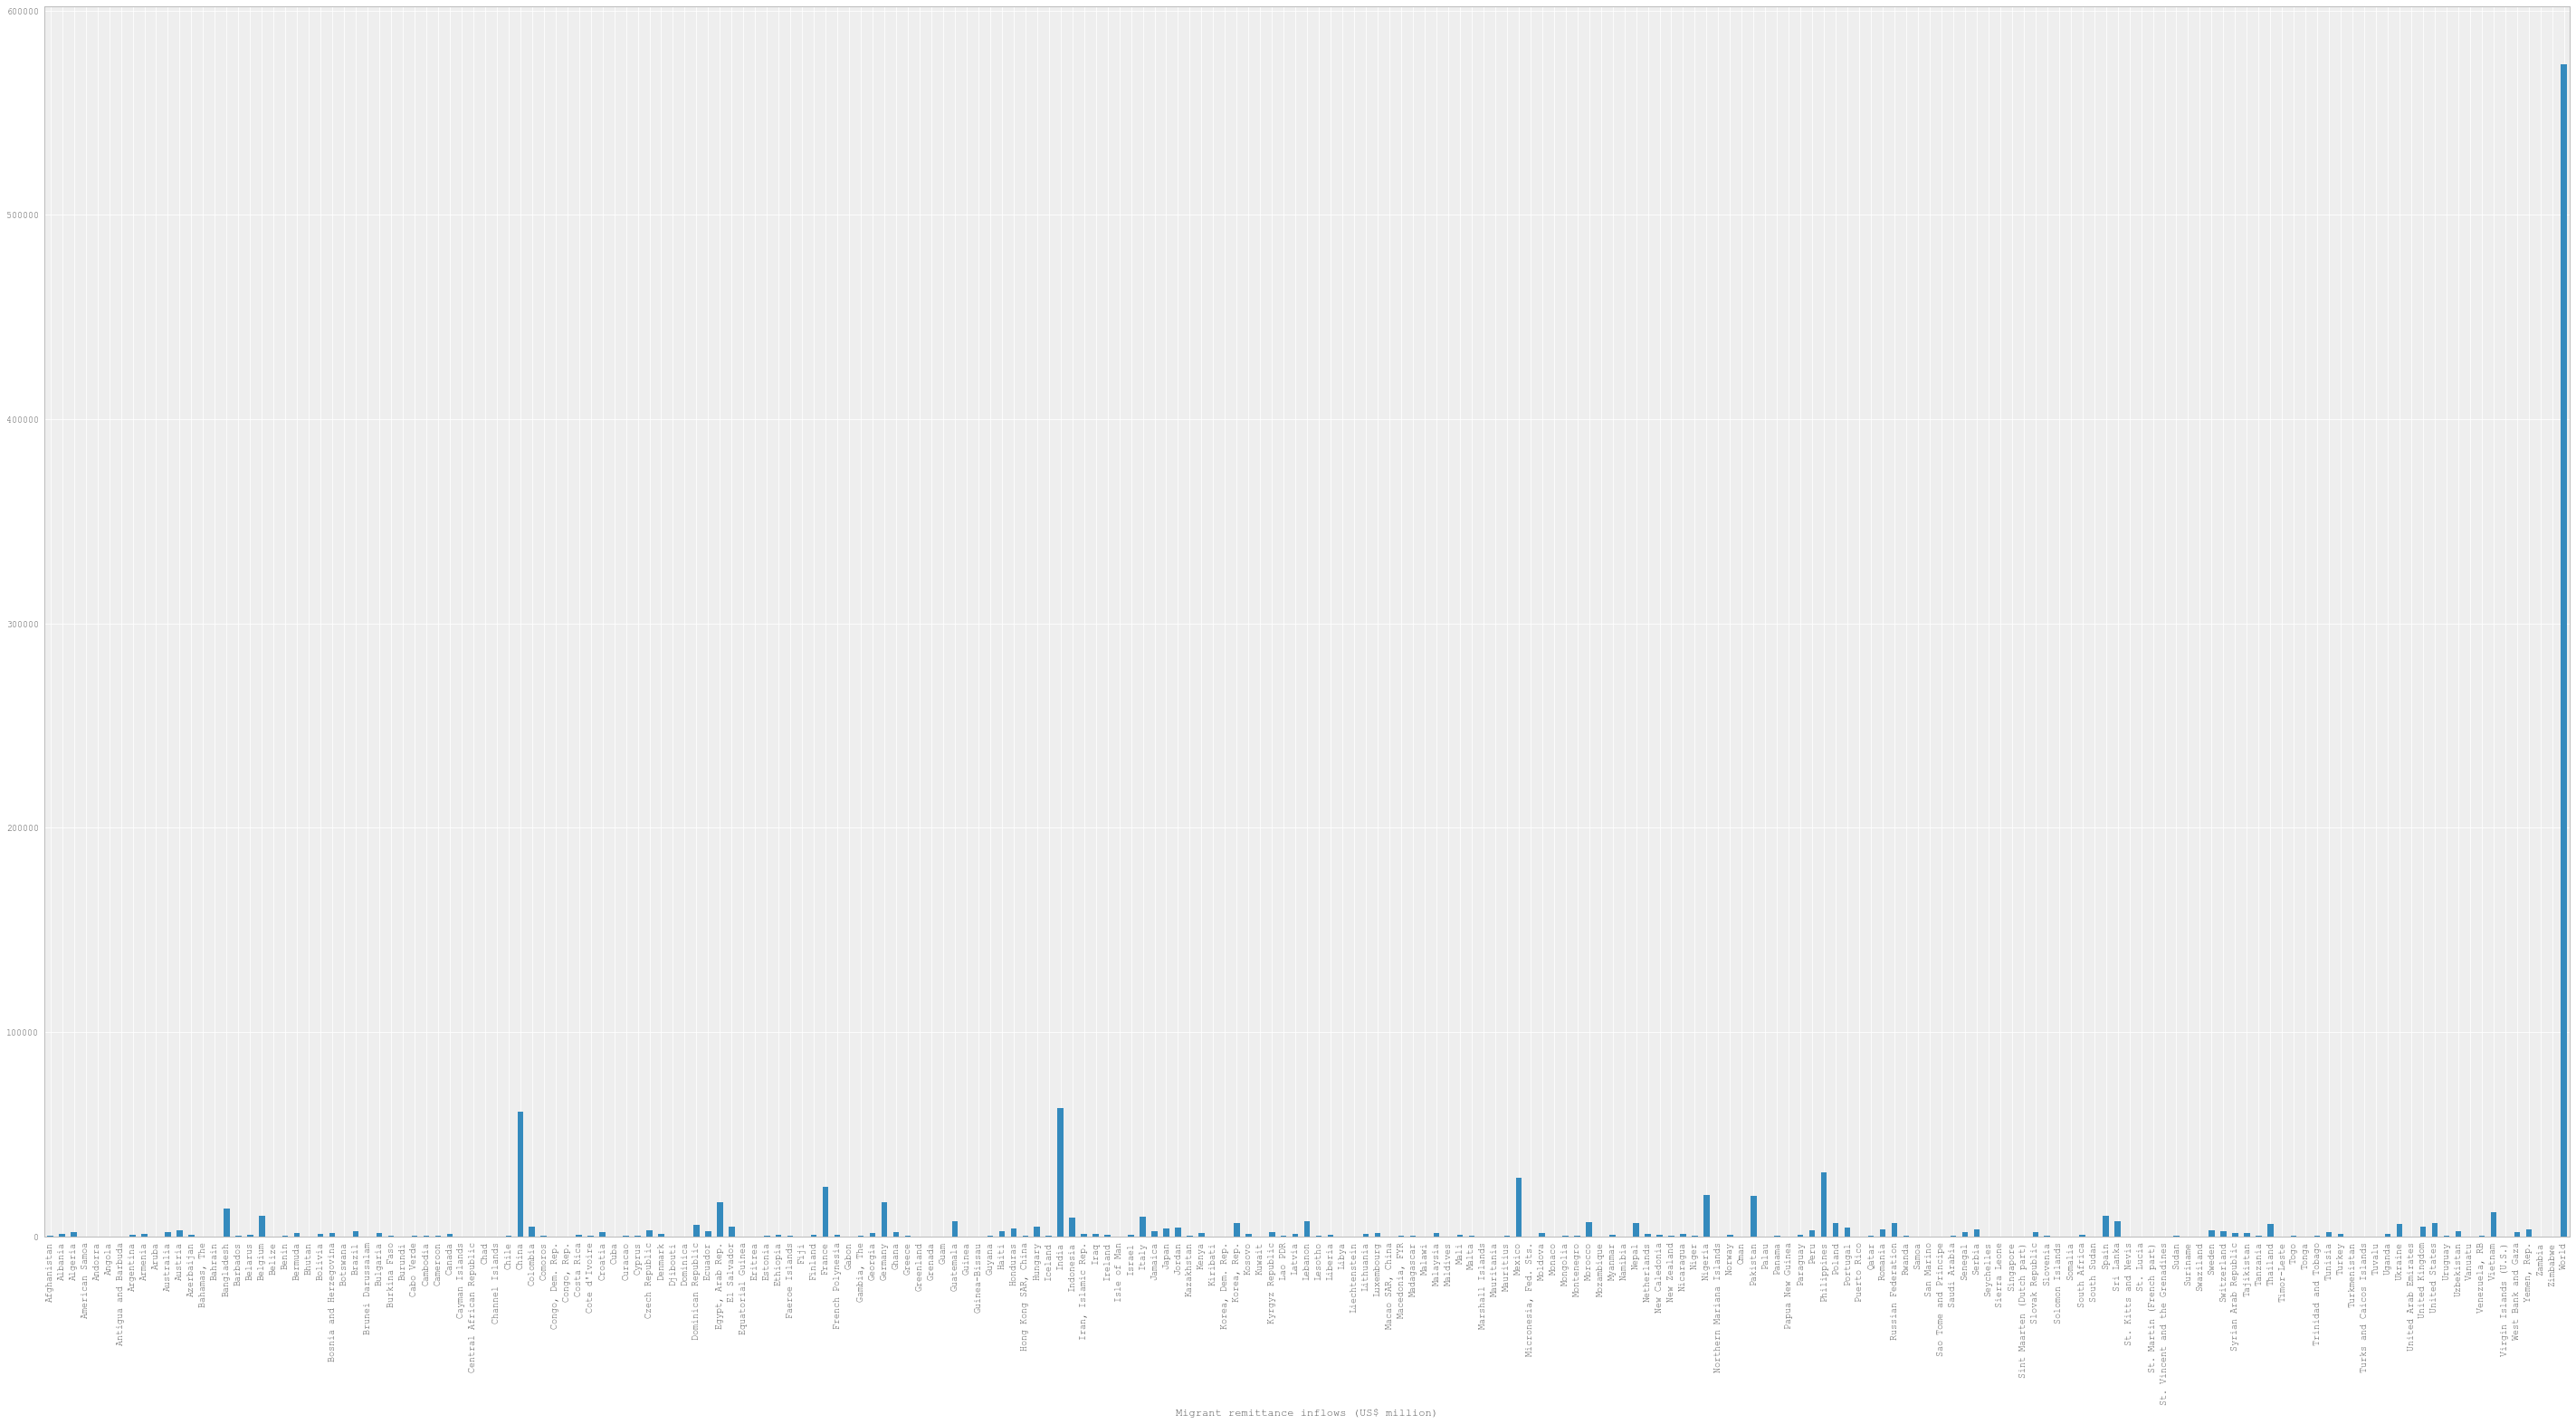

In [11]:
# plot selected columns 
remit_ind['2016'].plot(kind='bar', figsize=(50,25))

In [12]:
# create pandas series object with only the 2016 column 
remit_2016 = remit_ind['2016']

In [13]:
# verify object type of 2016
type(remit_2016)

pandas.core.series.Series

In [14]:
remit_2016.head()

Migrant remittance inflows (US$ million)
Afghanistan        430.839232
Albania           1051.219968
Algeria           2000.000000
American Samoa       0.000000
Andorra              0.000000
Name: 2016, dtype: float64

In [15]:
#sort values in descending order to make it easier to see top senders
remit_2016 = remit_2016.sort_values(ascending=False)

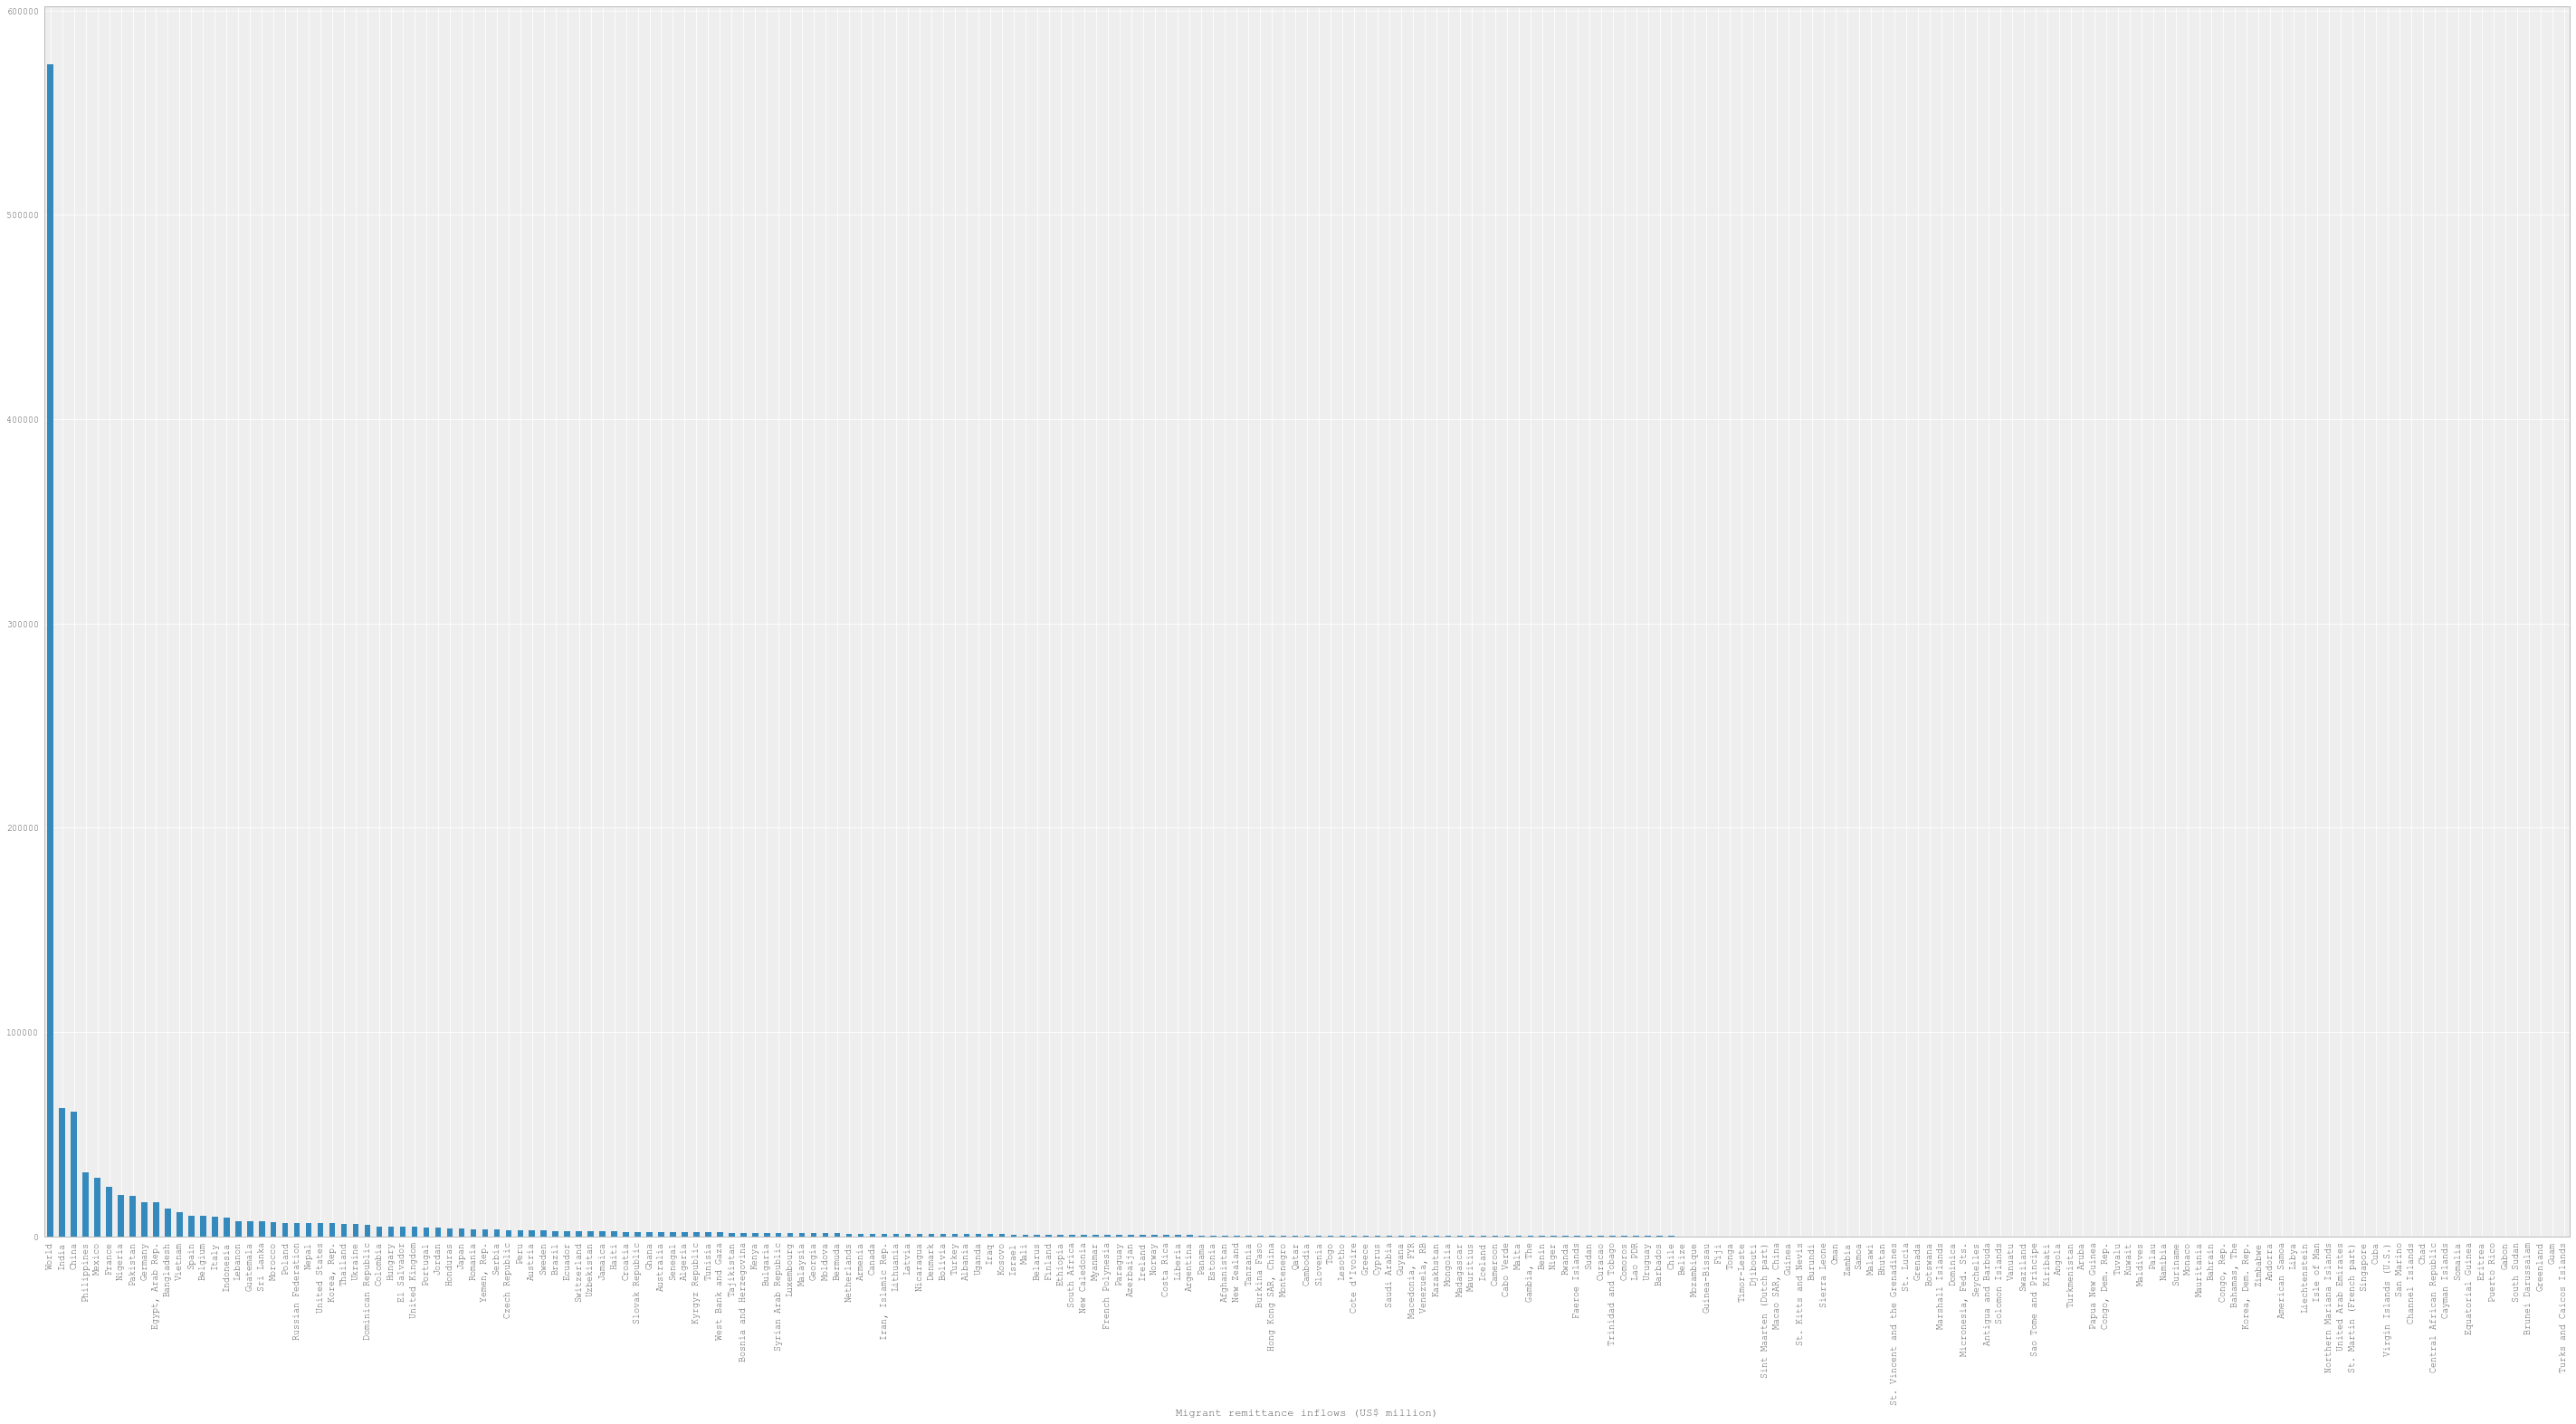

In [16]:
remit_2016.plot.bar(figsize=(50,25))

In [17]:
# drop world row for smaller intervals on y-axis
remit_2016 = remit_2016.drop(['World'])

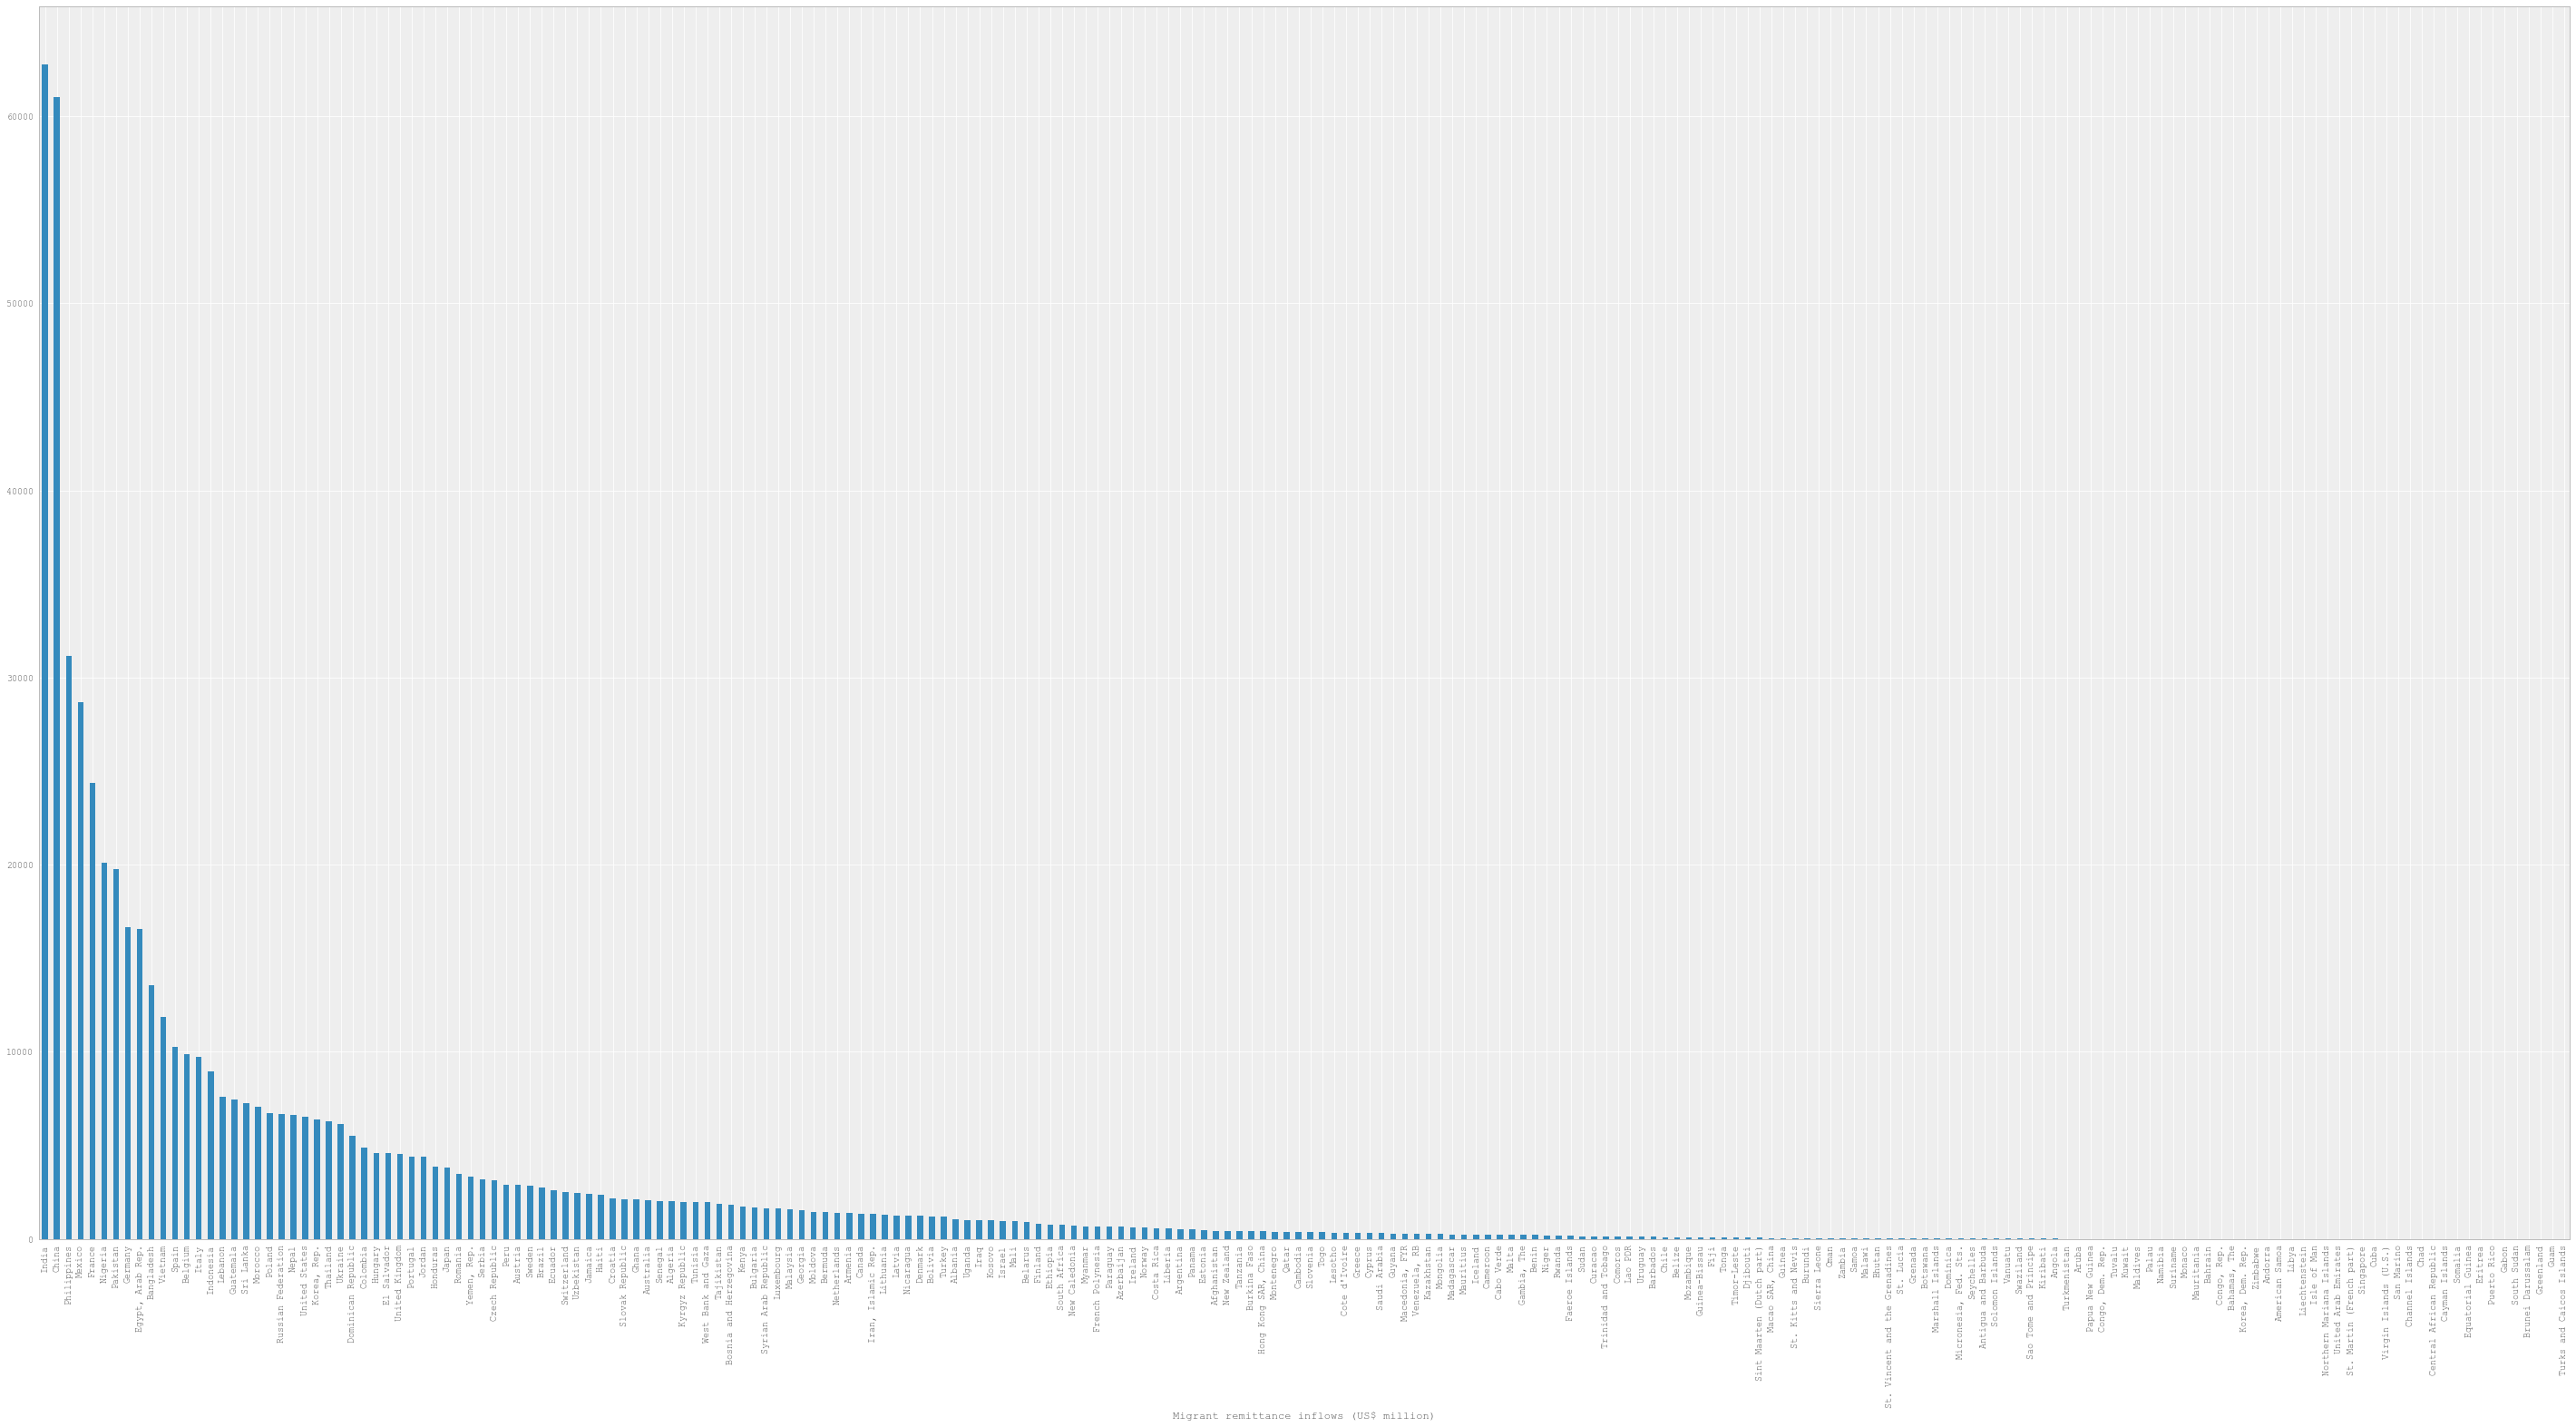

In [18]:
remit_2016.plot.bar(figsize=(50,25))

In [19]:
#drop 'world' row from dataframe
remit_ind = remit_ind.drop(['World'])

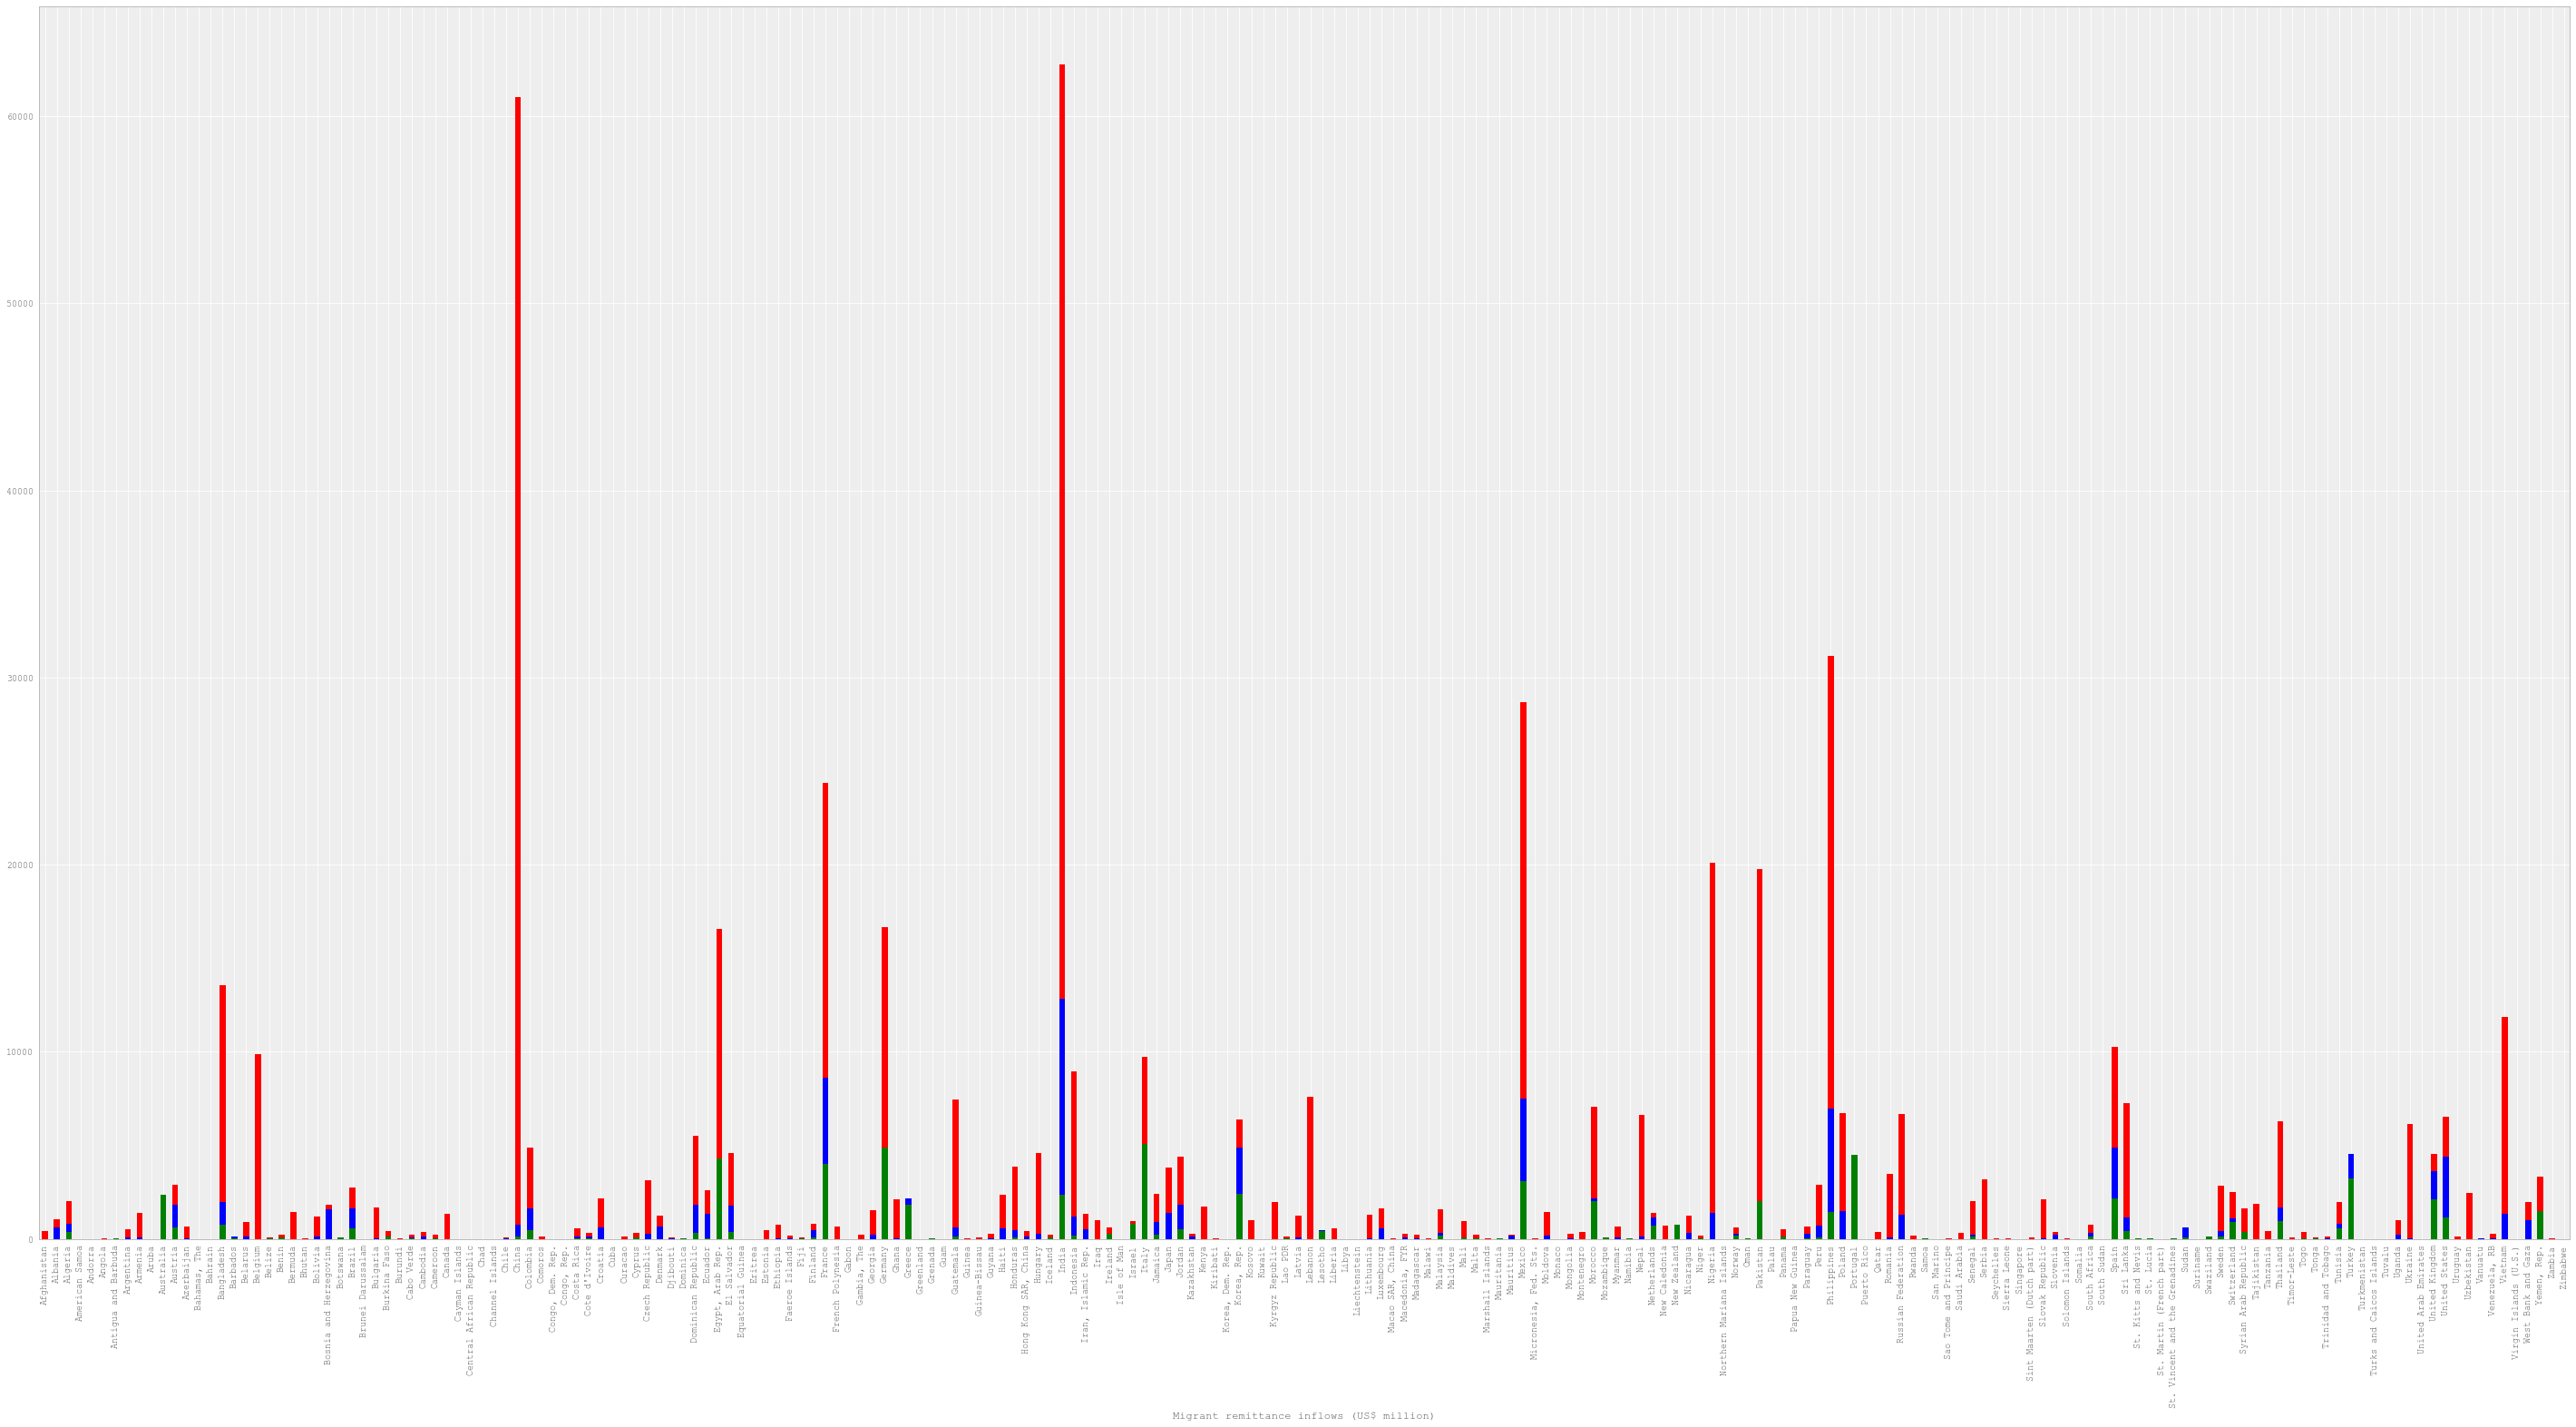

In [47]:
# plot various years
remit_ind['2016'].plot(kind='bar', color = 'red', figsize=(50,25))
remit_ind['2000'].plot(kind='bar', color = 'blue', figsize=(50,25))
remit_ind['1990'].plot(kind='bar', color = 'green', figsize=(50,25))

As you can see above, it looks like there is an exponenantial growth between 2000 and 2016 in money remittances. We can study those years in between even further to look at how fast money remittances grew, by how much and if there is noticeable jump off point where the chart spikes up precipitously. 

In [53]:
#transpose the axes, so that countries are the columns and years rows
t1_remit = remit_ind.T

In [54]:
t1_remit.head()

Migrant remittance inflows (US$ million),Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
1970,0.0,0.0,211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1971,0.0,0.0,238.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1972,0.0,0.0,227.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1973,0.0,0.0,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1974,0.0,0.0,202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
t1_remit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 1970 to 2017p
Columns: 214 entries, Afghanistan to Zimbabwe
dtypes: float64(214)
memory usage: 81.9+ KB


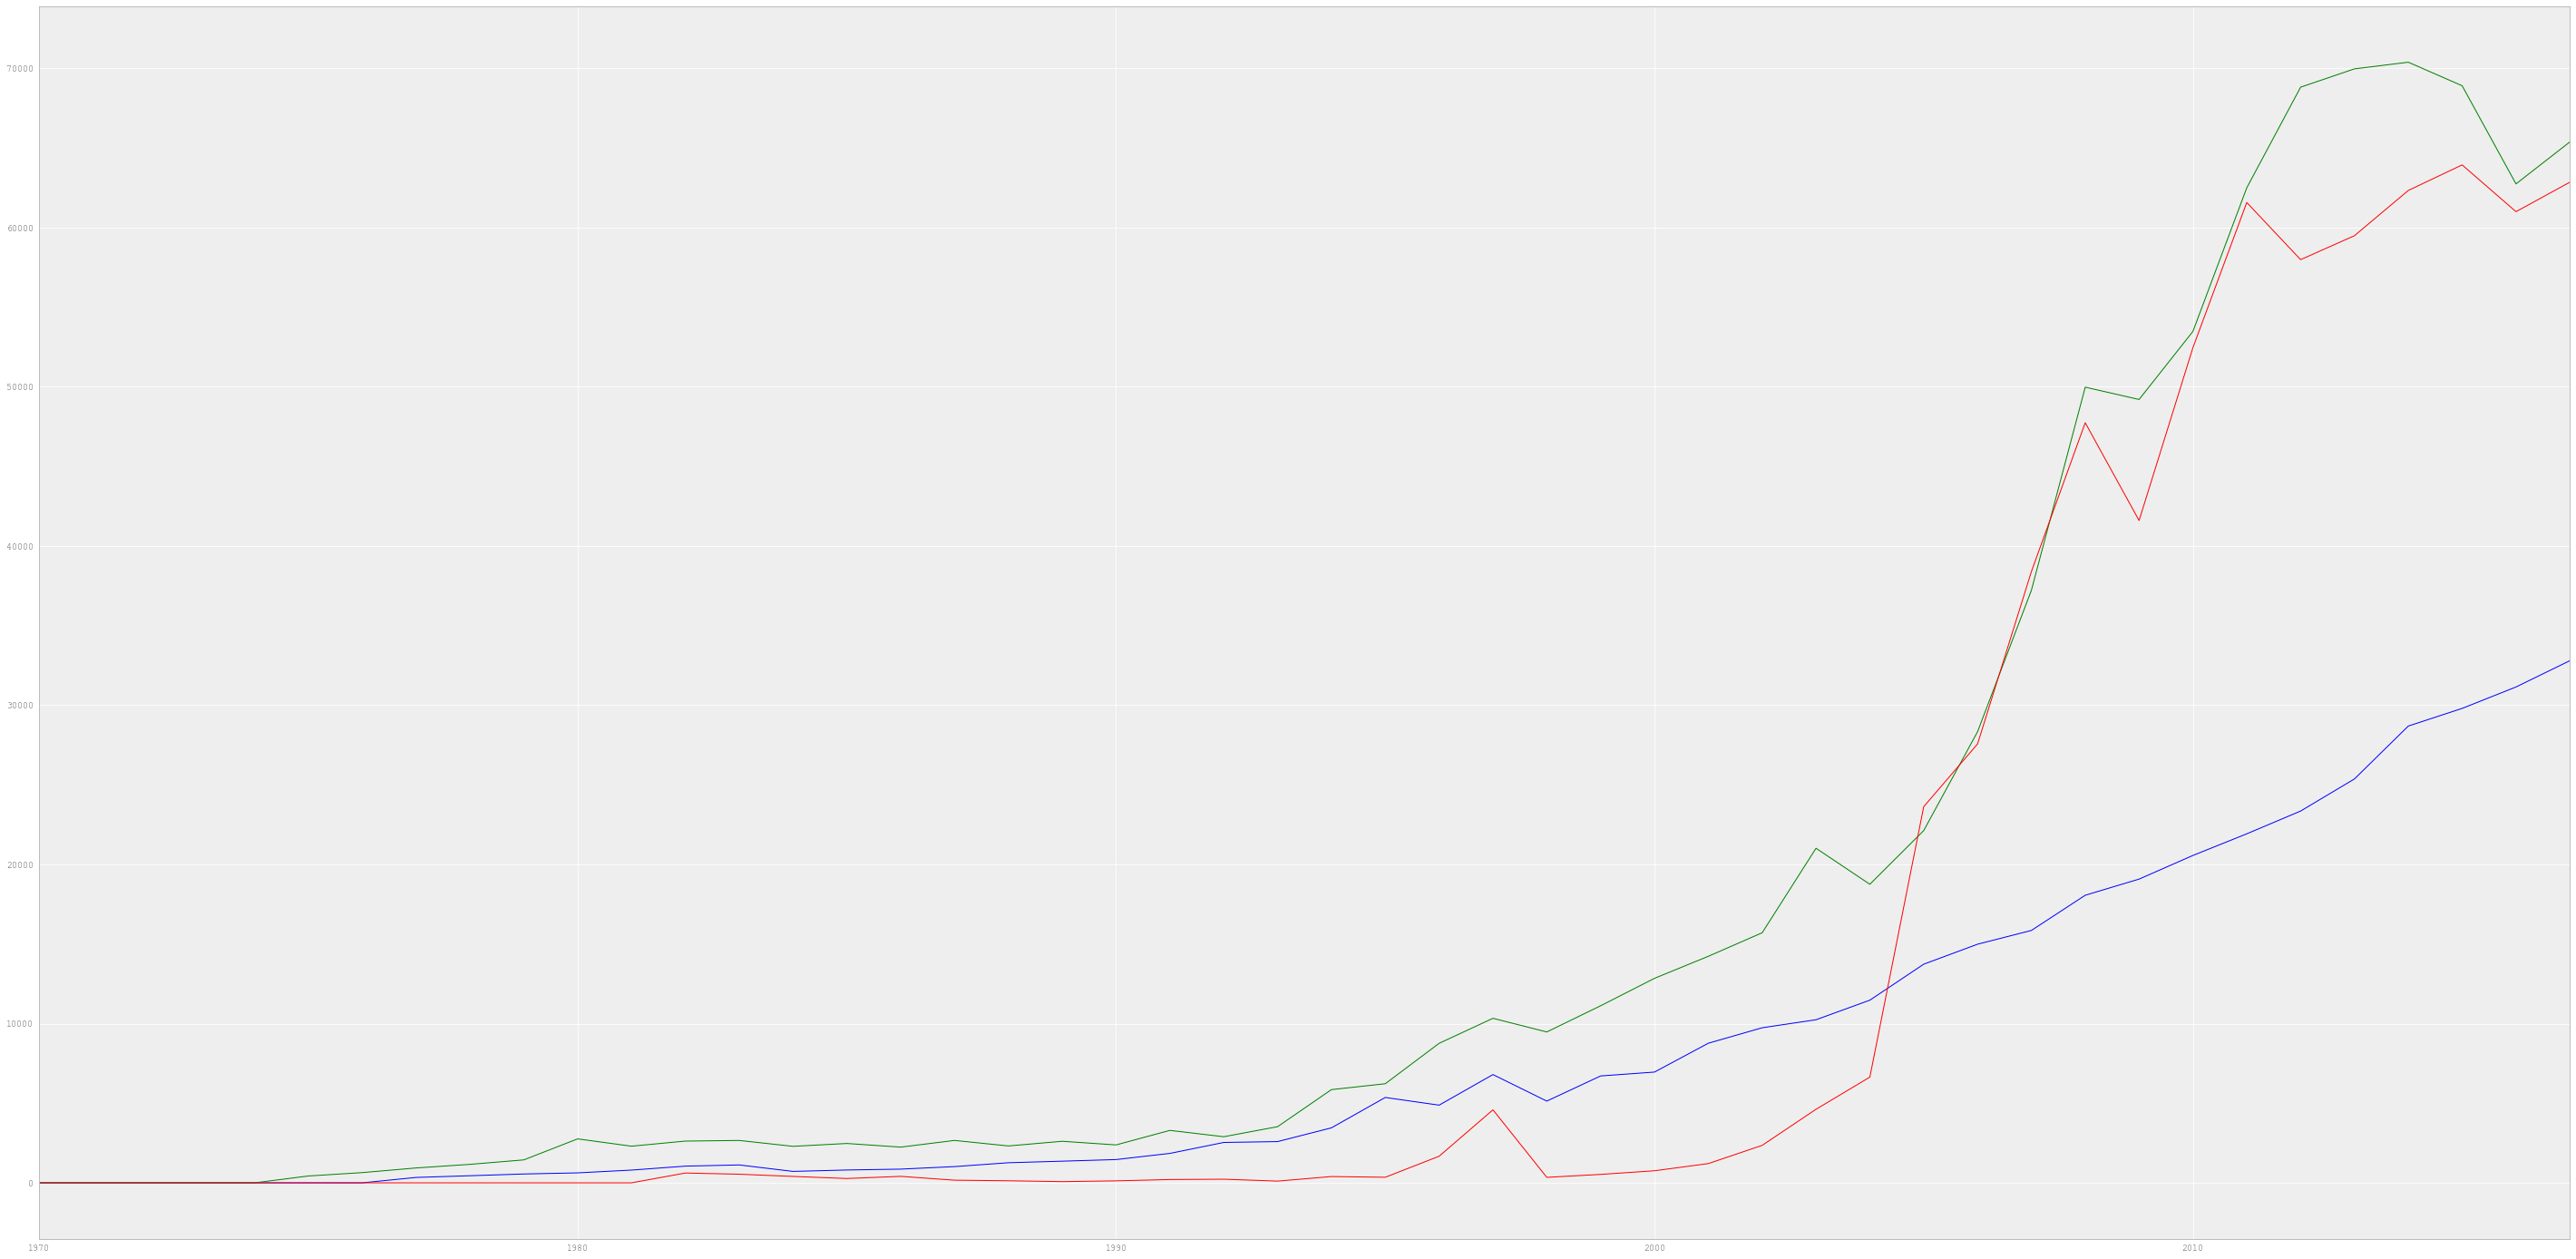

In [58]:
# plot selected countries
t1_remit['Philippines'].plot(color = 'blue', figsize=(50,25))
t1_remit['India'].plot(color = 'green', figsize=(50,25))
t1_remit['China'].plot(color = 'red', figsize=(50,25))

As we can see, there are several points where remittances grew rapidly. In the years 1997-98, all countries experienced growth in inflow of money remittances. From 2003-2008, China had remarkable growth in money remittances. It lagged behind both India and the Philippines prior to 2005, but its growth spiked up and surpassed the Philippines and matched that of India in money remittances. The Philippines had a steady growth and experienced very little dips except for the years 1996 and 1998. All three countries experienced a dip in 1998. However, only China and India had dips in 2009 at the peak of the Great Recession. Both countries experienced a dip again in 2015. Meanwhile, the Philippines has kept its steady pace in money remittances throughout these years. 

It's also interesting to note the population of each country in relation to money remittances. We can study this further using world population data.

In [59]:
# I downloaded this data to my computer from https://data.worldbank.org/indicator/SP.POP.TOTL
world_pop = pd.read_csv('data/world-population.csv', encoding = "ISO-8859-1")

In [60]:
world_pop.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [61]:
world_pop.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,...,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02
mean,1.182418e+08,1.198186e+08,1.219284e+08,1.245506e+08,1.272005e+08,1.299142e+08,1.327734e+08,1.356273e+08,1.385343e+08,1.415848e+08,...,2.672484e+08,2.707467e+08,2.742743e+08,2.778201e+08,2.813490e+08,2.860368e+08,2.897147e+08,2.934236e+08,2.971451e+08,3.008999e+08
std,3.737219e+08,3.781663e+08,3.847073e+08,3.932191e+08,4.018010e+08,4.106115e+08,4.199926e+08,4.293272e+08,4.388758e+08,4.489104e+08,...,8.522172e+08,8.627135e+08,8.733071e+08,8.839510e+08,8.946106e+08,9.070224e+08,9.179985e+08,9.290471e+08,9.401212e+08,9.512799e+08
min,4.279000e+03,4.453000e+03,4.566000e+03,4.656000e+03,4.748000e+03,4.841000e+03,4.936000e+03,5.033000e+03,5.161000e+03,5.303000e+03,...,1.007500e+04,1.004700e+04,1.002800e+04,1.002500e+04,1.005700e+04,1.027900e+04,1.081900e+04,1.090800e+04,1.100100e+04,1.109700e+04
25%,5.184015e+05,5.301480e+05,5.426568e+05,5.559520e+05,5.684168e+05,5.727790e+05,5.786500e+05,5.882328e+05,6.257960e+05,6.567582e+05,...,1.324970e+06,1.363216e+06,1.425982e+06,1.443678e+06,1.465471e+06,1.415726e+06,1.431560e+06,1.447306e+06,1.471523e+06,1.522803e+06
50%,3.669524e+06,3.734206e+06,3.839584e+06,3.955168e+06,4.074411e+06,4.170862e+06,4.235562e+06,4.300502e+06,4.367325e+06,4.449014e+06,...,8.856800e+06,9.219637e+06,9.298515e+06,9.378126e+06,9.460802e+06,9.624267e+06,9.746730e+06,9.879129e+06,1.002115e+07,1.011387e+07
75%,2.532754e+07,2.611541e+07,2.690508e+07,2.770050e+07,2.847884e+07,2.924750e+07,2.999693e+07,3.059503e+07,3.120239e+07,3.179527e+07,...,4.902772e+07,4.951866e+07,5.002825e+07,5.056766e+07,5.114119e+07,5.212651e+07,5.284602e+07,5.366877e+07,5.472897e+07,5.582470e+07
max,3.034193e+09,3.075115e+09,3.127961e+09,3.192794e+09,3.258201e+09,3.324952e+09,3.394865e+09,3.464440e+09,3.534821e+09,3.609384e+09,...,6.680423e+09,6.763746e+09,6.847215e+09,6.930657e+09,7.012844e+09,7.097401e+09,7.182860e+09,7.268986e+09,7.355220e+09,7.442136e+09


In [62]:
world_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 58 columns):
Country Name    264 non-null object
1960            260 non-null float64
1961            260 non-null float64
1962            260 non-null float64
1963            260 non-null float64
1964            260 non-null float64
1965            260 non-null float64
1966            260 non-null float64
1967            260 non-null float64
1968            260 non-null float64
1969            260 non-null float64
1970            260 non-null float64
1971            260 non-null float64
1972            260 non-null float64
1973            260 non-null float64
1974            260 non-null float64
1975            260 non-null float64
1976            260 non-null float64
1977            260 non-null float64
1978            260 non-null float64
1979            260 non-null float64
1980            260 non-null float64
1981            260 non-null float64
1982            260 non-null float64
1983    

In [63]:
world_pop = world_pop.set_index('Country Name')

In [64]:
world_pop.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
Afghanistan,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
Angola,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [65]:
t_world = world_pop.T

In [66]:
t_world.head()

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,54211.0,8996351.0,5643182.0,1608800.0,13411.0,92490932.0,92634.0,20619075.0,1874120.0,20013.0,...,32000.0,34743000.0,63699.0,3.034193e+09,108646.0,947000.0,5172135.0,17396367.0,3044846.0,3747369.0
1961,55438.0,9166764.0,5753024.0,1659800.0,14375.0,95044497.0,101078.0,20953077.0,1941491.0,20486.0,...,34100.0,35428000.0,65713.0,3.075115e+09,112119.0,966000.0,5260501.0,17850045.0,3140264.0,3870756.0
1962,56225.0,9345868.0,5866061.0,1711319.0,15370.0,97682294.0,112472.0,21287682.0,2009526.0,21117.0,...,36300.0,36123000.0,67808.0,3.127961e+09,115788.0,994000.0,5351799.0,18322335.0,3240587.0,3999419.0
1963,56695.0,9533954.0,5980417.0,1762621.0,16412.0,100411076.0,125566.0,21621840.0,2077575.0,21882.0,...,38700.0,36836000.0,69964.0,3.192794e+09,119561.0,1022000.0,5446063.0,18809939.0,3345145.0,4132756.0
1964,57032.0,9731361.0,6093321.0,1814135.0,17469.0,103239902.0,138529.0,21953929.0,2144998.0,22698.0,...,41300.0,37574000.0,72131.0,3.258201e+09,123354.0,1050000.0,5543339.0,19308166.0,3452942.0,4269863.0


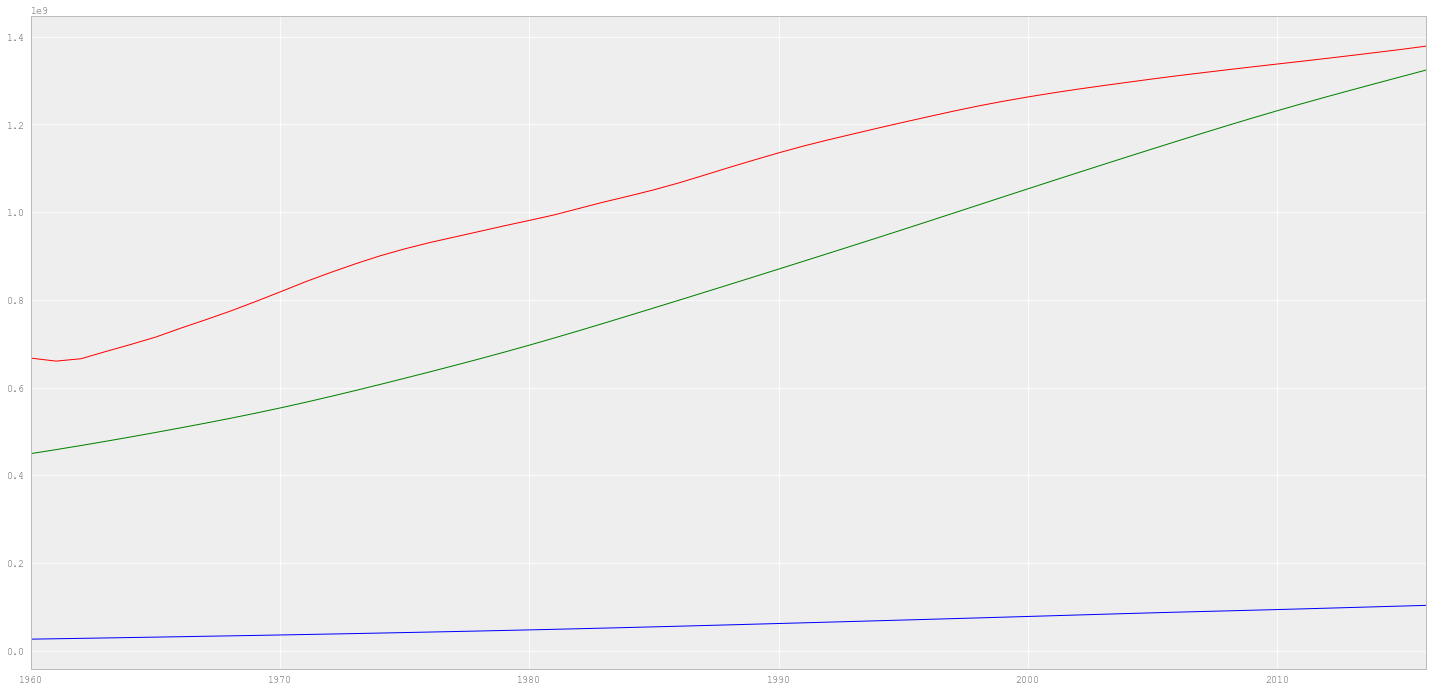

In [68]:
t_world['Philippines'].plot(color = 'blue', figsize=(25,12))
t_world['India'].plot(color = 'green', figsize=(25,12))
t_world['China'].plot(color = 'red', figsize=(25,12))

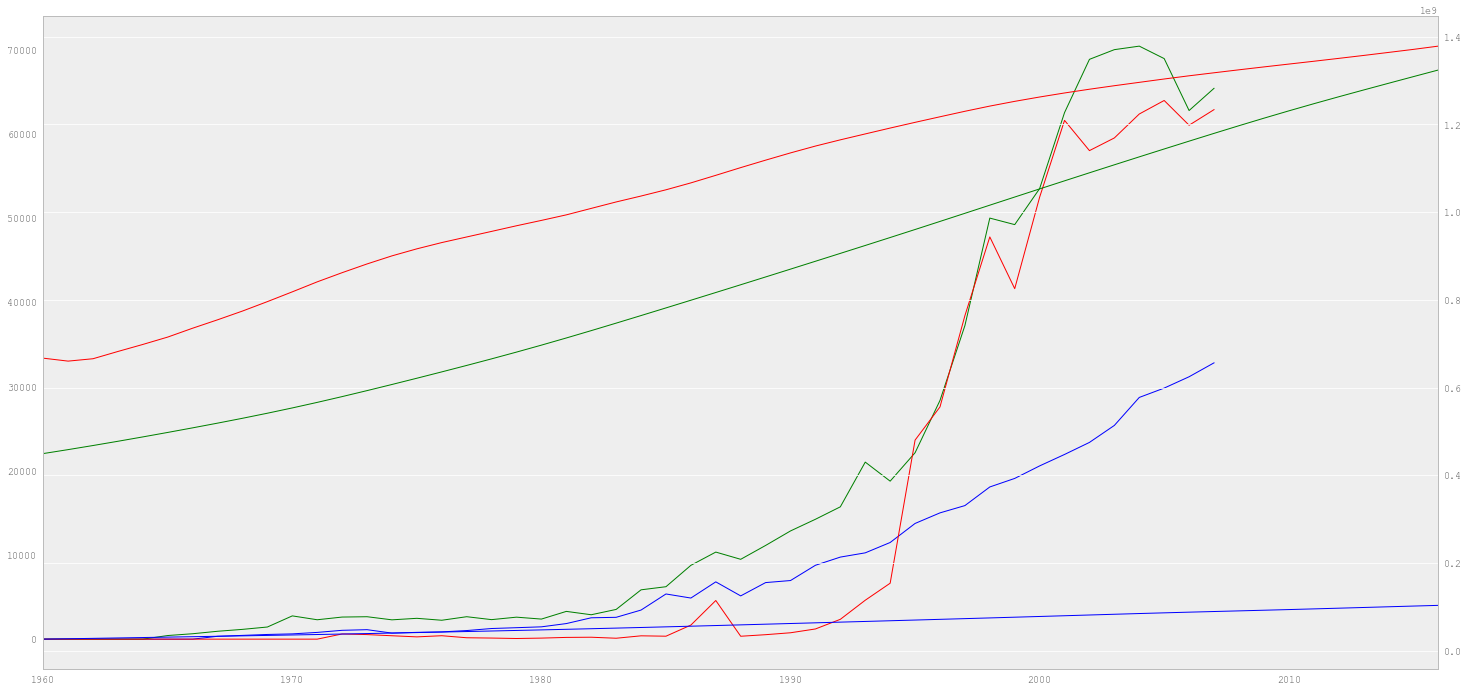

In [70]:
t1_remit['Philippines'].plot(color = 'blue', figsize=(25,12))
t1_remit['India'].plot(color = 'green', figsize=(25,12))
t1_remit['China'].plot(color = 'red', figsize=(25,12))
t_world['Philippines'].plot(color = 'blue', secondary_y=True, figsize=(25,12))
t_world['India'].plot(color = 'green', secondary_y=True, figsize=(25,12))
t_world['China'].plot(color = 'red', secondary_y=True, figsize=(25,12))

In [73]:
t_world = t_world.drop(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969'])

In [77]:
t_world.head()

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1970,59063.0,11126123.0,6776381.0,2135479.0,24276.0,122398374.0,235499.0,23973058.0,2525065.0,27292.0,...,63000.0,42729000.0,85389.0,3.684766e+09,143176.0,1219000.0,6193810.0,22502502.0,4173928.0,5175618.0
1971,59440.0,11417825.0,6927269.0,2187853.0,25559.0,125807419.0,278808.0,24366439.0,2587706.0,27916.0,...,71000.0,43725000.0,88022.0,3.762198e+09,145439.0,1247000.0,6300554.0,23106806.0,4317748.0,5351195.0
1972,59840.0,11721940.0,7094834.0,2243126.0,26892.0,129269375.0,332760.0,24782949.0,2650484.0,28492.0,...,76000.0,44758000.0,90823.0,3.838925e+09,147321.0,1278000.0,6407295.0,23736489.0,4469895.0,5535874.0
1973,60243.0,12027822.0,7277960.0,2296752.0,28232.0,132863416.0,397174.0,25213388.0,2712781.0,29014.0,...,84000.0,45825000.0,93765.0,3.914858e+09,148889.0,1308000.0,6523452.0,24384538.0,4629402.0,5727044.0
1974,60528.0,12321541.0,7474338.0,2350124.0,29520.0,136696761.0,471364.0,25644506.0,2773747.0,29488.0,...,90000.0,46918000.0,96796.0,3.991431e+09,150221.0,1339000.0,6661566.0,25040940.0,4794754.0,5920943.0


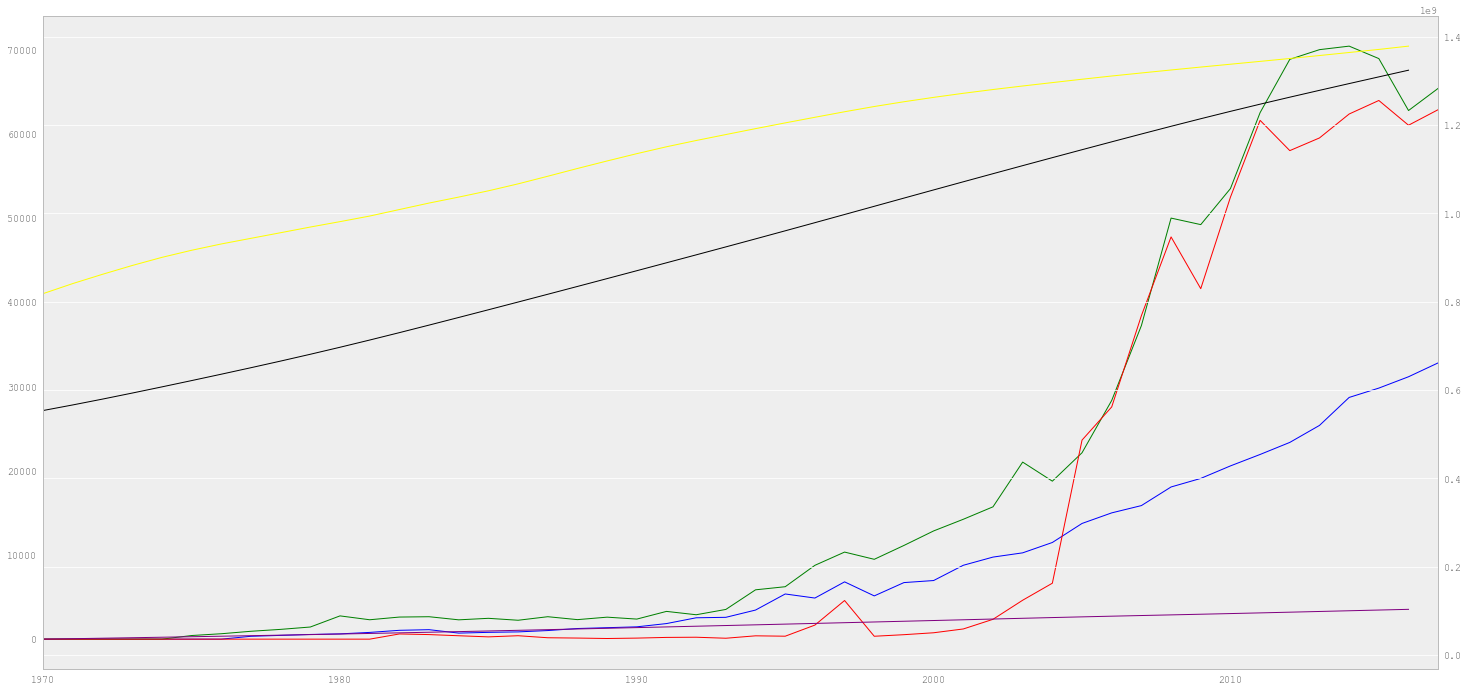

In [80]:
t1_remit['Philippines'].plot(color = 'blue', figsize=(25,12))
t1_remit['India'].plot(color = 'green', figsize=(25,12))
t1_remit['China'].plot(color = 'red', figsize=(25,12))
t_world['Philippines'].plot(color = 'purple', secondary_y=True, figsize=(25,12))
t_world['India'].plot(color = 'black', secondary_y=True, figsize=(25,12))
t_world['China'].plot(color = 'yellow', secondary_y=True, figsize=(25,12))